In [2]:
import numpy as np #lin. Alg.
import pandas as pd #data processing
import matplotlib.pyplot as plt
import matplotlib.image as matimg

#importing keras modules
import keras
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import load_model
from keras import backend as K
from keras import optimizers
import tensorflow as tf
import random



config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

#Python Image Library for image processing
from PIL import Image

import os

image_path = 'D:deep/mrlEyes/'

Using TensorFlow backend.


In [3]:
def get_im_array(f, size):
    im = Image.open(f).resize(size)
    return np.array(im)

print(len([f for f in os.listdir(image_path+'open')]))

42952


In [3]:
open_dir = image_path+ 'open/'
closed_dir = image_path+ 'closed/'

FINAL_SIDELEN = 25
FINAL_SHAPE = (FINAL_SIDELEN,FINAL_SIDELEN)

open_count = len([f for f in os.listdir(open_dir)])
closed_count = len([f for f in os.listdir(closed_dir)])

tt_split = .8

X_train = []
y_train = []
X_test = []
y_test = []


i = 0

open_files = random.sample(os.listdir(open_dir), open_count)
closed_files = random.sample(os.listdir(closed_dir), closed_count)

for f in open_files:
    if f.endswith('png'):
        if i<=tt_split*open_count:
            X_train.append(get_im_array(open_dir+f,FINAL_SHAPE))
            y_train.append(1)
        else:
            X_test.append(get_im_array(open_dir+f,FINAL_SHAPE))
            y_test.append(1)
        i+=1
        
print(i)
    
i = 0

for f in closed_files:
    if f.endswith('png'):
        if i<=tt_split*closed_count:
            X_train.append(get_im_array(closed_dir+f,FINAL_SHAPE))
            y_train.append(0)
        else:
            X_test.append(get_im_array(closed_dir+f,FINAL_SHAPE))
            y_test.append(0)
        i+=1
        
print(i)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
    
x_train = X_train.reshape(X_train.shape[0], FINAL_SIDELEN, FINAL_SIDELEN, 1)/255.
x_test = X_test.reshape(X_test.shape[0], FINAL_SIDELEN, FINAL_SIDELEN, 1)/255.  


42952
41946


In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(67919, 25, 25, 1)
(16979, 25, 25, 1)
(67919,)
(16979,)


In [5]:
#HyperParamters
#Max Pooling Sizes
m_1 = 2
m_4 = 2
#Dropout values of the layers
d_1 = .4
d_2 = .4
#kernel sizes
k_1 = 3
k_2 = 3
k_3 = 3
k_4 = 3
#Convolution layer sizes
c_1 = 16
c_2 = 8
c_3 = 8

In [6]:
data_format = 'channels_last'

#Building model
model = Sequential()

model.add(Conv2D(c_1, kernel_size=(k_1, k_1), input_shape=x_train.shape[1:], activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(m_1,m_1)))

model.add(Conv2D(c_2, kernel_size=(k_2, k_2), activation='relu', padding='same'))


model.add(Conv2D(c_3, kernel_size=(k_4, k_4), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(m_4,m_4)))

model.add(Flatten())
model.add(Dropout(d_1))
model.add(Dense(16, activation='relu'))

model.add(Dropout(d_2))
model.add(Dense(1, activation='sigmoid'))

#Compiling the model
model.compile(keras.optimizers.Adam(), loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

keras.utils.print_summary(model)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 8)         1160      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 8)         584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)  

In [7]:
#Number of epochs to train with
epoch_num = 100

model_log = model.fit(x_train, y_train, epochs=epoch_num, batch_size=2000, verbose=1, validation_data=(x_test, y_test), shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 67919 samples, validate on 16979 samples
Epoch 1/100
67919/67919 [==============================] - 4s 62us/step - loss: 0.6816 - acc: 0.5617 - val_loss: 0.6540 - val_acc: 0.7014
Epoch 2/100
67919/67919 [==============================] - 1s 18us/step - loss: 0.5956 - acc: 0.7022 - val_loss: 0.4699 - val_acc: 0.8308
Epoch 3/100
67919/67919 [==============================] - 1s 18us/step - loss: 0.4401 - acc: 0.8145 - val_loss: 0.3398 - val_acc: 0.8747
Epoch 4/100
67919/67919 [==============================] - 1s 18us/step - loss: 0.3642 - acc: 0.8569 - val_loss: 0.2867 - val_acc: 0.8933
Epoch 5/100
67919/67919 [==============================] - 1s 18us/step - loss: 0.3151 - acc: 0.8781 - val_loss: 0.2439 - val_acc: 0.9108
Epoch 6/100
67919/67919 [==============================] - 1s 18us/step - loss: 0.2803 - acc: 0.8928 - val_loss: 0.2136 - val_acc: 0.9226
Epoch 7/100
67919/67919 [==============================] - 1s 18us/step - 

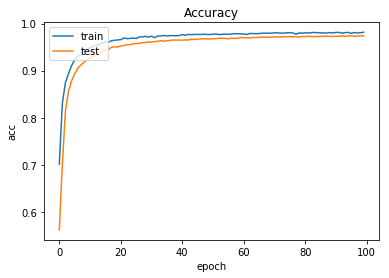

In [8]:
plt.plot(model_log.history['val_acc'])
plt.plot(model_log.history['acc'])
plt.title('Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [5]:
#Save a Keras model as an .h5 file
model.save('classifeye.h5')

In [12]:
#Shows the image and prediction for the 'view_num' element of the test set.
view_num = 4


print('Prediction: ')
print(model.predict(x_test[view_num:view_num+1]))
print()
print('Correct: ')
print(y_test[view_num])




Prediction: 
[[0.9953916]]

Correct: 
1


In [4]:
model = load_model('cassifeye.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
